In [1]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Dense
from keras import Input
import tensorflow as tf
from keras.layers.merge import concatenate

In [2]:
#fix random seed-1 (or whatever other integer) for reproductibility
seed = 7
np.random.seed(seed)

In [3]:
#Generate data
N = 1000
X_train1 = np.linspace(0.0,1.0,N)
X_train2 = X_train1*X_train1
y_train1 = np.sin(2*np.pi*X_train1)
y_train2 = np.exp(X_train1)

X_val1 = np.random.rand(100)
X_val1 = np.sort(X_val1)
X_val2 = X_val1*X_val1
y_val1 = np.sin(2*np.pi*X_val1)
y_val2 = np.exp(X_val1)

In [4]:
#Define model
x0_left = Input(shape = (1,))
x0_right = Input(shape = (1,))

x1_left = Dense(20,activation = 'sigmoid', input_dim = 1)(x0_left)
x1_right = Dense(20,activation = 'sigmoid', input_dim = 1)(x0_right)

x2_left = Dense(20,activation = 'sigmoid')(x1_left)
x2_right = Dense(20,activation = 'sigmoid')(x1_right)

x3 = concatenate([x1_left,x1_right])

x4 = Dense(20, activation = 'sigmoid')(x3)
x5 = Dense(20, activation = 'sigmoid')(x4)

x6_left = Dense(20,activation = 'sigmoid')(x5)
x6_right = Dense(30, activation = 'sigmoid')(x5)

x7_left = Dense(20,activation = 'sigmoid')(x6_left)
x7_right = Dense(30, activation = 'sigmoid')(x6_right)

x8_left = Dense(1,kernel_initializer = "uniform")(x7_left)
x8_right = Dense(1,kernel_initializer = "uniform")(x7_right)
                                                                             
model = Model(inputs = [x0_left,x0_right], outputs = [x8_left,x8_right])
model.compile(optimizer = 'rmsprop', loss = ['mse','mse'],metrics = 'mse')
hist = model.fit([X_train1,X_train2],[y_train1,y_train2],epochs = 300, batch_size = 32,
                 validation_data = ([X_val1,X_val2],[y_val1,y_val2]))
    

Epoch 1/300
32/32 [==============================] - 2s 18ms/step - loss: 3.2173 - dense_10_loss: 0.4912 - dense_11_loss: 2.7261 - dense_10_mse: 0.4912 - dense_11_mse: 2.7261 - val_loss: 1.7491 - val_dense_10_loss: 0.4833 - val_dense_11_loss: 1.2658 - val_dense_10_mse: 0.4833 - val_dense_11_mse: 1.2658
Epoch 2/300
32/32 [==============================] - 0s 5ms/step - loss: 1.4562 - dense_10_loss: 0.5067 - dense_11_loss: 0.9494 - dense_10_mse: 0.5067 - dense_11_mse: 0.9494 - val_loss: 0.8051 - val_dense_10_loss: 0.4826 - val_dense_11_loss: 0.3225 - val_dense_10_mse: 0.4826 - val_dense_11_mse: 0.3225
Epoch 3/300
32/32 [==============================] - 0s 5ms/step - loss: 0.7993 - dense_10_loss: 0.4927 - dense_11_loss: 0.3066 - dense_10_mse: 0.4927 - dense_11_mse: 0.3066 - val_loss: 0.6926 - val_dense_10_loss: 0.4830 - val_dense_11_loss: 0.2096 - val_dense_10_mse: 0.4830 - val_dense_11_mse: 0.2096
Epoch 4/300
32/32 [==============================] - 0s 5ms/step - loss: 0.7377 - dense_10

Epoch 28/300
32/32 [==============================] - 0s 4ms/step - loss: 0.2415 - dense_10_loss: 0.2262 - dense_11_loss: 0.0153 - dense_10_mse: 0.2262 - dense_11_mse: 0.0153 - val_loss: 0.1644 - val_dense_10_loss: 0.1588 - val_dense_11_loss: 0.0056 - val_dense_10_mse: 0.1588 - val_dense_11_mse: 0.0056
Epoch 29/300
32/32 [==============================] - 0s 5ms/step - loss: 0.1554 - dense_10_loss: 0.1487 - dense_11_loss: 0.0067 - dense_10_mse: 0.1487 - dense_11_mse: 0.0067 - val_loss: 0.1182 - val_dense_10_loss: 0.1109 - val_dense_11_loss: 0.0074 - val_dense_10_mse: 0.1109 - val_dense_11_mse: 0.0074
Epoch 30/300
32/32 [==============================] - 0s 5ms/step - loss: 0.1228 - dense_10_loss: 0.1160 - dense_11_loss: 0.0069 - dense_10_mse: 0.1160 - dense_11_mse: 0.0069 - val_loss: 0.1002 - val_dense_10_loss: 0.0939 - val_dense_11_loss: 0.0063 - val_dense_10_mse: 0.0939 - val_dense_11_mse: 0.0063
Epoch 31/300
32/32 [==============================] - 0s 5ms/step - loss: 0.1140 - dense

Epoch 55/300
32/32 [==============================] - 0s 5ms/step - loss: 0.0782 - dense_10_loss: 0.0701 - dense_11_loss: 0.0081 - dense_10_mse: 0.0701 - dense_11_mse: 0.0081 - val_loss: 0.0631 - val_dense_10_loss: 0.0561 - val_dense_11_loss: 0.0070 - val_dense_10_mse: 0.0561 - val_dense_11_mse: 0.0070
Epoch 56/300
32/32 [==============================] - 0s 5ms/step - loss: 0.0786 - dense_10_loss: 0.0708 - dense_11_loss: 0.0079 - dense_10_mse: 0.0708 - dense_11_mse: 0.0079 - val_loss: 0.0640 - val_dense_10_loss: 0.0569 - val_dense_11_loss: 0.0072 - val_dense_10_mse: 0.0569 - val_dense_11_mse: 0.0072
Epoch 57/300
32/32 [==============================] - 0s 5ms/step - loss: 0.0759 - dense_10_loss: 0.0684 - dense_11_loss: 0.0076 - dense_10_mse: 0.0684 - dense_11_mse: 0.0076 - val_loss: 0.0715 - val_dense_10_loss: 0.0603 - val_dense_11_loss: 0.0113 - val_dense_10_mse: 0.0603 - val_dense_11_mse: 0.0113
Epoch 58/300
32/32 [==============================] - 0s 5ms/step - loss: 0.0802 - dense

Epoch 82/300
32/32 [==============================] - 0s 5ms/step - loss: 0.0629 - dense_10_loss: 0.0617 - dense_11_loss: 0.0013 - dense_10_mse: 0.0617 - dense_11_mse: 0.0013 - val_loss: 0.0551 - val_dense_10_loss: 0.0546 - val_dense_11_loss: 5.2590e-04 - val_dense_10_mse: 0.0546 - val_dense_11_mse: 5.2590e-04
Epoch 83/300
32/32 [==============================] - 0s 5ms/step - loss: 0.0672 - dense_10_loss: 0.0661 - dense_11_loss: 0.0011 - dense_10_mse: 0.0661 - dense_11_mse: 0.0011 - val_loss: 0.0553 - val_dense_10_loss: 0.0546 - val_dense_11_loss: 6.6868e-04 - val_dense_10_mse: 0.0546 - val_dense_11_mse: 6.6868e-04
Epoch 84/300
32/32 [==============================] - 0s 8ms/step - loss: 0.0636 - dense_10_loss: 0.0625 - dense_11_loss: 0.0011 - dense_10_mse: 0.0625 - dense_11_mse: 0.0011 - val_loss: 0.0565 - val_dense_10_loss: 0.0560 - val_dense_11_loss: 5.1024e-04 - val_dense_10_mse: 0.0560 - val_dense_11_mse: 5.1024e-04
Epoch 85/300
32/32 [==============================] - 0s 5ms/ste

32/32 [==============================] - 0s 4ms/step - loss: 0.0401 - dense_10_loss: 0.0391 - dense_11_loss: 9.6424e-04 - dense_10_mse: 0.0391 - dense_11_mse: 9.6424e-04 - val_loss: 0.0312 - val_dense_10_loss: 0.0298 - val_dense_11_loss: 0.0013 - val_dense_10_mse: 0.0298 - val_dense_11_mse: 0.0013
Epoch 109/300
32/32 [==============================] - 0s 4ms/step - loss: 0.0371 - dense_10_loss: 0.0362 - dense_11_loss: 9.3410e-04 - dense_10_mse: 0.0362 - dense_11_mse: 9.3410e-04 - val_loss: 0.0297 - val_dense_10_loss: 0.0283 - val_dense_11_loss: 0.0014 - val_dense_10_mse: 0.0283 - val_dense_11_mse: 0.0014
Epoch 110/300
32/32 [==============================] - 0s 5ms/step - loss: 0.0329 - dense_10_loss: 0.0322 - dense_11_loss: 7.0213e-04 - dense_10_mse: 0.0322 - dense_11_mse: 7.0213e-04 - val_loss: 0.0279 - val_dense_10_loss: 0.0274 - val_dense_11_loss: 4.9395e-04 - val_dense_10_mse: 0.0274 - val_dense_11_mse: 4.9395e-04
Epoch 111/300
32/32 [==============================] - 0s 3ms/step 

Epoch 134/300
32/32 [==============================] - 0s 4ms/step - loss: 0.0038 - dense_10_loss: 0.0030 - dense_11_loss: 8.5654e-04 - dense_10_mse: 0.0030 - dense_11_mse: 8.5654e-04 - val_loss: 0.0014 - val_dense_10_loss: 0.0013 - val_dense_11_loss: 1.1097e-04 - val_dense_10_mse: 0.0013 - val_dense_11_mse: 1.1097e-04
Epoch 135/300
32/32 [==============================] - 0s 5ms/step - loss: 0.0029 - dense_10_loss: 0.0020 - dense_11_loss: 8.8075e-04 - dense_10_mse: 0.0020 - dense_11_mse: 8.8075e-04 - val_loss: 0.0012 - val_dense_10_loss: 0.0011 - val_dense_11_loss: 1.3217e-04 - val_dense_10_mse: 0.0011 - val_dense_11_mse: 1.3217e-04
Epoch 136/300
32/32 [==============================] - 0s 5ms/step - loss: 0.0025 - dense_10_loss: 0.0019 - dense_11_loss: 6.5419e-04 - dense_10_mse: 0.0019 - dense_11_mse: 6.5419e-04 - val_loss: 0.0049 - val_dense_10_loss: 0.0037 - val_dense_11_loss: 0.0012 - val_dense_10_mse: 0.0037 - val_dense_11_mse: 0.0012
Epoch 137/300
32/32 [========================

32/32 [==============================] - 0s 5ms/step - loss: 0.0019 - dense_10_loss: 0.0010 - dense_11_loss: 9.0548e-04 - dense_10_mse: 0.0010 - dense_11_mse: 9.0548e-04 - val_loss: 0.0017 - val_dense_10_loss: 7.7203e-04 - val_dense_11_loss: 9.0469e-04 - val_dense_10_mse: 7.7203e-04 - val_dense_11_mse: 9.0469e-04
Epoch 160/300
32/32 [==============================] - 0s 5ms/step - loss: 0.0018 - dense_10_loss: 9.9850e-04 - dense_11_loss: 8.1015e-04 - dense_10_mse: 9.9850e-04 - dense_11_mse: 8.1015e-04 - val_loss: 0.0017 - val_dense_10_loss: 0.0010 - val_dense_11_loss: 7.1454e-04 - val_dense_10_mse: 0.0010 - val_dense_11_mse: 7.1454e-04
Epoch 161/300
32/32 [==============================] - 0s 5ms/step - loss: 0.0015 - dense_10_loss: 8.6226e-04 - dense_11_loss: 6.2300e-04 - dense_10_mse: 8.6226e-04 - dense_11_mse: 6.2300e-04 - val_loss: 0.0034 - val_dense_10_loss: 0.0027 - val_dense_11_loss: 6.8309e-04 - val_dense_10_mse: 0.0027 - val_dense_11_mse: 6.8309e-04
Epoch 162/300
32/32 [======

32/32 [==============================] - 0s 6ms/step - loss: 0.0016 - dense_10_loss: 9.2728e-04 - dense_11_loss: 7.0787e-04 - dense_10_mse: 9.2728e-04 - dense_11_mse: 7.0787e-04 - val_loss: 0.0012 - val_dense_10_loss: 4.7630e-04 - val_dense_11_loss: 6.9234e-04 - val_dense_10_mse: 4.7630e-04 - val_dense_11_mse: 6.9234e-04
Epoch 185/300
32/32 [==============================] - 0s 6ms/step - loss: 0.0016 - dense_10_loss: 8.0140e-04 - dense_11_loss: 7.6275e-04 - dense_10_mse: 8.0140e-04 - dense_11_mse: 7.6275e-04 - val_loss: 5.2925e-04 - val_dense_10_loss: 3.3049e-04 - val_dense_11_loss: 1.9876e-04 - val_dense_10_mse: 3.3049e-04 - val_dense_11_mse: 1.9876e-04
Epoch 186/300
32/32 [==============================] - 0s 5ms/step - loss: 0.0015 - dense_10_loss: 7.3952e-04 - dense_11_loss: 7.1750e-04 - dense_10_mse: 7.3952e-04 - dense_11_mse: 7.1750e-04 - val_loss: 2.5571e-04 - val_dense_10_loss: 1.8178e-04 - val_dense_11_loss: 7.3930e-05 - val_dense_10_mse: 1.8178e-04 - val_dense_11_mse: 7.3930

Epoch 209/300
32/32 [==============================] - 0s 5ms/step - loss: 0.0012 - dense_10_loss: 6.8658e-04 - dense_11_loss: 4.7441e-04 - dense_10_mse: 6.8658e-04 - dense_11_mse: 4.7441e-04 - val_loss: 6.2809e-04 - val_dense_10_loss: 3.7738e-04 - val_dense_11_loss: 2.5071e-04 - val_dense_10_mse: 3.7738e-04 - val_dense_11_mse: 2.5071e-04
Epoch 210/300
32/32 [==============================] - 0s 8ms/step - loss: 0.0012 - dense_10_loss: 6.5833e-04 - dense_11_loss: 5.1005e-04 - dense_10_mse: 6.5833e-04 - dense_11_mse: 5.1005e-04 - val_loss: 0.0037 - val_dense_10_loss: 0.0025 - val_dense_11_loss: 0.0011 - val_dense_10_mse: 0.0025 - val_dense_11_mse: 0.0011
Epoch 211/300
32/32 [==============================] - 0s 6ms/step - loss: 0.0014 - dense_10_loss: 9.2439e-04 - dense_11_loss: 4.9885e-04 - dense_10_mse: 9.2439e-04 - dense_11_mse: 4.9885e-04 - val_loss: 0.0042 - val_dense_10_loss: 0.0030 - val_dense_11_loss: 0.0012 - val_dense_10_mse: 0.0030 - val_dense_11_mse: 0.0012
Epoch 212/300
32/

32/32 [==============================] - 0s 5ms/step - loss: 0.0017 - dense_10_loss: 0.0010 - dense_11_loss: 6.9334e-04 - dense_10_mse: 0.0010 - dense_11_mse: 6.9334e-04 - val_loss: 0.0030 - val_dense_10_loss: 0.0021 - val_dense_11_loss: 9.2086e-04 - val_dense_10_mse: 0.0021 - val_dense_11_mse: 9.2086e-04
Epoch 234/300
32/32 [==============================] - 0s 4ms/step - loss: 0.0015 - dense_10_loss: 9.1512e-04 - dense_11_loss: 6.2780e-04 - dense_10_mse: 9.1512e-04 - dense_11_mse: 6.2780e-04 - val_loss: 3.3751e-04 - val_dense_10_loss: 1.2568e-04 - val_dense_11_loss: 2.1183e-04 - val_dense_10_mse: 1.2568e-04 - val_dense_11_mse: 2.1183e-04
Epoch 235/300
32/32 [==============================] - 0s 4ms/step - loss: 0.0013 - dense_10_loss: 7.6606e-04 - dense_11_loss: 5.6293e-04 - dense_10_mse: 7.6606e-04 - dense_11_mse: 5.6293e-04 - val_loss: 0.0026 - val_dense_10_loss: 0.0023 - val_dense_11_loss: 2.9337e-04 - val_dense_10_mse: 0.0023 - val_dense_11_mse: 2.9337e-04
Epoch 236/300
32/32 [==

32/32 [==============================] - 0s 6ms/step - loss: 9.8011e-04 - dense_10_loss: 5.8903e-04 - dense_11_loss: 3.9108e-04 - dense_10_mse: 5.8903e-04 - dense_11_mse: 3.9108e-04 - val_loss: 1.8338e-04 - val_dense_10_loss: 1.2587e-04 - val_dense_11_loss: 5.7504e-05 - val_dense_10_mse: 1.2587e-04 - val_dense_11_mse: 5.7504e-05
Epoch 258/300
32/32 [==============================] - 0s 6ms/step - loss: 0.0013 - dense_10_loss: 7.7099e-04 - dense_11_loss: 5.4939e-04 - dense_10_mse: 7.7099e-04 - dense_11_mse: 5.4939e-04 - val_loss: 0.0017 - val_dense_10_loss: 8.1089e-04 - val_dense_11_loss: 9.0342e-04 - val_dense_10_mse: 8.1089e-04 - val_dense_11_mse: 9.0342e-04
Epoch 259/300
32/32 [==============================] - 0s 7ms/step - loss: 0.0012 - dense_10_loss: 6.3251e-04 - dense_11_loss: 5.4550e-04 - dense_10_mse: 6.3251e-04 - dense_11_mse: 5.4550e-04 - val_loss: 6.7588e-04 - val_dense_10_loss: 5.5402e-04 - val_dense_11_loss: 1.2186e-04 - val_dense_10_mse: 5.5402e-04 - val_dense_11_mse: 1.

32/32 [==============================] - 0s 6ms/step - loss: 0.0015 - dense_10_loss: 8.7375e-04 - dense_11_loss: 6.1885e-04 - dense_10_mse: 8.7375e-04 - dense_11_mse: 6.1885e-04 - val_loss: 7.3237e-04 - val_dense_10_loss: 3.1010e-04 - val_dense_11_loss: 4.2226e-04 - val_dense_10_mse: 3.1010e-04 - val_dense_11_mse: 4.2226e-04
Epoch 282/300
32/32 [==============================] - 0s 8ms/step - loss: 0.0015 - dense_10_loss: 8.2050e-04 - dense_11_loss: 6.3677e-04 - dense_10_mse: 8.2050e-04 - dense_11_mse: 6.3677e-04 - val_loss: 0.0015 - val_dense_10_loss: 7.0226e-04 - val_dense_11_loss: 8.2595e-04 - val_dense_10_mse: 7.0226e-04 - val_dense_11_mse: 8.2595e-04
Epoch 283/300
32/32 [==============================] - 0s 6ms/step - loss: 0.0012 - dense_10_loss: 6.4442e-04 - dense_11_loss: 5.1727e-04 - dense_10_mse: 6.4442e-04 - dense_11_mse: 5.1727e-04 - val_loss: 0.0034 - val_dense_10_loss: 0.0027 - val_dense_11_loss: 6.7262e-04 - val_dense_10_mse: 0.0027 - val_dense_11_mse: 6.7262e-04
Epoch 2

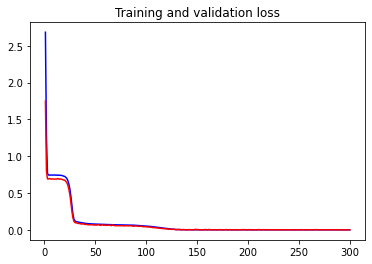

In [5]:
train_loss = hist.history['loss']
valid_loss = hist.history['val_loss']
ep = range(1, len(train_loss)+1)
plt.figure()
plt.plot(ep,train_loss,'b-')
plt.plot(ep,valid_loss,'r-')
plt.title('Training and validation loss')
plt.show()

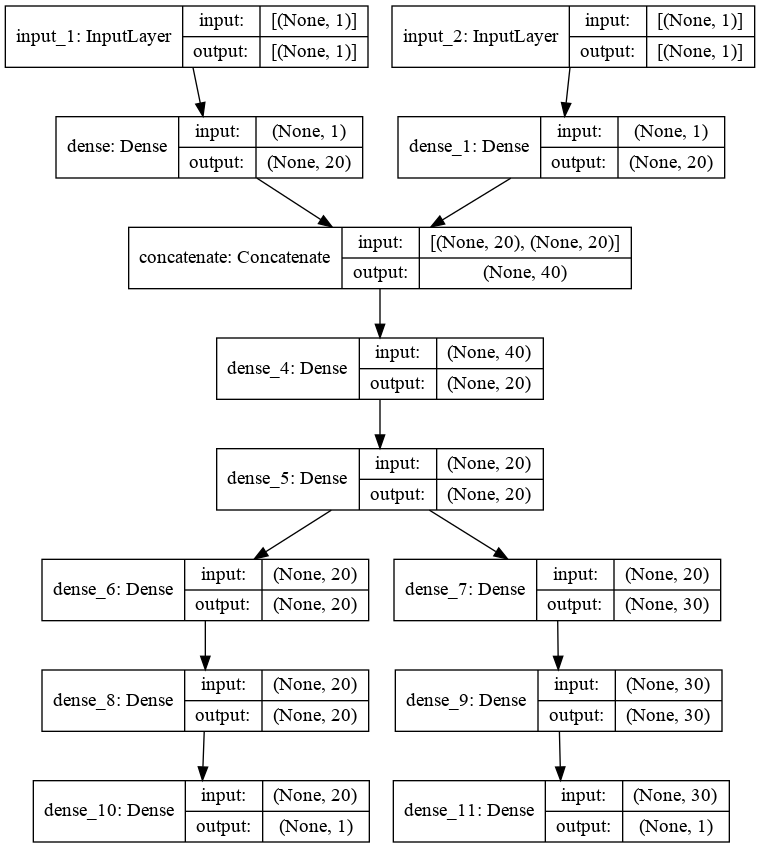

In [6]:
tf.keras.utils.plot_model(model,show_shapes = True)

In [7]:
[y_sin,y_exp] = model.predict([X_val1,X_val2])

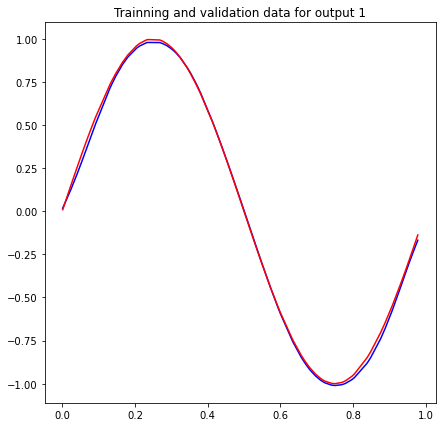

In [9]:
plt.figure(figsize = (7,7))
plt.plot(X_val1,y_sin,'b')
plt.plot(X_val1,y_val1,'r')
plt.title('Trainning and validation data for output 1')
plt.show()

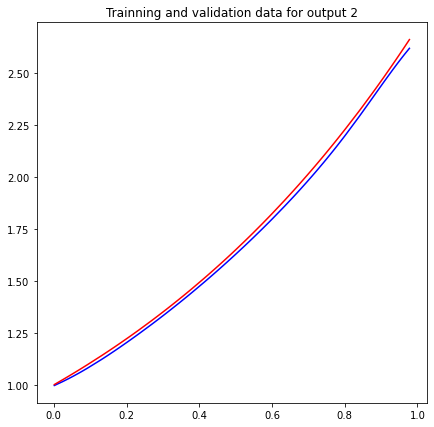

In [11]:
plt.figure(figsize = (7,7))
plt.plot(X_val1,y_exp,'b')
plt.plot(X_val1,y_val2,'r')
plt.title('Trainning and validation data for output 2')
plt.show()

In [12]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 20)           40          input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 20)           40          input_2[0][0]                    
______________________________________________________________________________________________